In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from alpha_vantage.timeseries import TimeSeries

In [179]:
api_key = 'BCOEECJ5M1H1ZHSQ'
stock = 'SPY'
obs_period = 1
vol_multiplier = 2
start_dt = np.datetime64('2019-01-01')
end_dt = np.datetime64('2022-04-30')

In [192]:
#This segment of codes obtain the code based on the timeline
ts = TimeSeries(api_key, output_format = 'pandas')
df, meta = ts.get_daily(symbol=stock, outputsize='full')
df = df[~(df.index <= start_dt)]
df = df[~(df.index >= end_dt)]

In [204]:
df

,date,1. open,2. high,3. low,4. close,5. volume,volatility
0,2019-01-02,245.98,251.21,245.95,250.18,126925199.0,
1,2019-01-03,248.23,248.57,243.67,244.21,144140692.0,-0.023863
2,2019-01-04,247.59,253.11,247.17,252.39,142628834.0,0.033496
3,2019-01-07,252.69,255.95,251.69,254.38,103139100.0,0.007885
4,2019-01-08,256.82,257.31,254.00,256.77,102512587.0,0.009395
...,...,...,...,...,...,...,...
834,2022-04-25,423.67,428.69,418.84,428.51,119647748.0,0.005798
835,2022-04-26,425.83,426.04,416.07,416.10,100647304.0,-0.028961
836,2022-04-27,417.24,422.92,415.01,417.27,122029990.0,0.002812
837,2022-04-28,422.29,429.64,417.60,427.81,105449088.0,0.025259


In [194]:
#This code helps to reverse the codes so the earliest is first
df = df.reindex(index=df.index[::-1])

In [196]:
#This code gives index to df
df = df.reset_index()

In [198]:
#Initiate and append the volality into a list
volatility_list = ['']
for i in range(839):
    if i == 0:
        continue
    else:
        volatility_list.append((df['4. close'][i]/ df['4. close'][i-1]) -1)

In [199]:
#Insert list into df
df['volatility'] = volatility_list

In [200]:
df

,date,1. open,2. high,3. low,4. close,5. volume,volatility
0,2019-01-02,245.98,251.21,245.95,250.18,126925199.0,
1,2019-01-03,248.23,248.57,243.67,244.21,144140692.0,-0.023863
2,2019-01-04,247.59,253.11,247.17,252.39,142628834.0,0.033496
3,2019-01-07,252.69,255.95,251.69,254.38,103139100.0,0.007885
4,2019-01-08,256.82,257.31,254.00,256.77,102512587.0,0.009395
...,...,...,...,...,...,...,...
834,2022-04-25,423.67,428.69,418.84,428.51,119647748.0,0.005798
835,2022-04-26,425.83,426.04,416.07,416.10,100647304.0,-0.028961
836,2022-04-27,417.24,422.92,415.01,417.27,122029990.0,0.002812
837,2022-04-28,422.29,429.64,417.60,427.81,105449088.0,0.025259


In [207]:

df2 = df.iloc[1:366] #Since there is no data for volatility of 2019-01-02, the next row is used
#Convert it into float so I can manupulate the volatility for calculation
df2['volatility'] = df2['volatility'].astype('float')

C:\Users\User\AppData\Local\Temp\ipykernel_14576\4121556283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['volatility'] = df2['volatility'].astype('float')


In [208]:
df2

,date,1. open,2. high,3. low,4. close,5. volume,volatility
1,2019-01-03,248.23,248.57,243.67,244.21,144140692.0,-0.023863
2,2019-01-04,247.59,253.11,247.17,252.39,142628834.0,0.033496
3,2019-01-07,252.69,255.95,251.69,254.38,103139100.0,0.007885
4,2019-01-08,256.82,257.31,254.00,256.77,102512587.0,0.009395
5,2019-01-09,257.56,258.91,256.19,257.97,95006554.0,0.004673
...,...,...,...,...,...,...,...
361,2020-06-09,320.30,323.28,319.36,320.79,77174695.0,-0.007457
362,2020-06-10,321.42,322.39,318.22,319.00,93944722.0,-0.005580
363,2020-06-11,311.46,312.15,300.01,300.61,208285190.0,-0.057649
364,2020-06-12,308.24,309.08,298.60,304.21,194450402.0,0.011976


In [209]:
#To confirm that all data are float64 for calculation, except for date
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 1 to 365
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        365 non-null    datetime64[ns]
 1   1. open     365 non-null    float64       
 2   2. high     365 non-null    float64       
 3   3. low      365 non-null    float64       
 4   4. close    365 non-null    float64       
 5   5. volume   365 non-null    float64       
 6   volatility  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.1 KB


In [210]:
So = df2['4. close'][365] #reference price

In [211]:
So

307.05

In [212]:
df2['buy_threshold'] = [round((So + vol_multiplier*volatility_value),2) for volatility_value in df2['volatility']]

C:\Users\User\AppData\Local\Temp\ipykernel_14576\77248469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['buy_threshold'] = [round((So + vol_multiplier*volatility_value),2) for volatility_value in df2['volatility']]


In [213]:
df2

,date,1. open,2. high,3. low,4. close,5. volume,volatility,buy_threshold
1,2019-01-03,248.23,248.57,243.67,244.21,144140692.0,-0.023863,307.00
2,2019-01-04,247.59,253.11,247.17,252.39,142628834.0,0.033496,307.12
3,2019-01-07,252.69,255.95,251.69,254.38,103139100.0,0.007885,307.07
4,2019-01-08,256.82,257.31,254.00,256.77,102512587.0,0.009395,307.07
5,2019-01-09,257.56,258.91,256.19,257.97,95006554.0,0.004673,307.06
...,...,...,...,...,...,...,...,...
361,2020-06-09,320.30,323.28,319.36,320.79,77174695.0,-0.007457,307.04
362,2020-06-10,321.42,322.39,318.22,319.00,93944722.0,-0.005580,307.04
363,2020-06-11,311.46,312.15,300.01,300.61,208285190.0,-0.057649,306.93
364,2020-06-12,308.24,309.08,298.60,304.21,194450402.0,0.011976,307.07


In [214]:
#I use list comprehension to quickily round off the sell_threshold
df2['sell_threshold'] = [round((So - vol_multiplier*volatility_value),2) for volatility_value in df2['volatility']]

C:\Users\User\AppData\Local\Temp\ipykernel_14576\3394069081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sell_threshold'] = [round((So - vol_multiplier*volatility_value),2) for volatility_value in df2['volatility']]


In [215]:
df2

,date,1. open,2. high,3. low,4. close,5. volume,volatility,buy_threshold,sell_threshold
1,2019-01-03,248.23,248.57,243.67,244.21,144140692.0,-0.023863,307.00,307.10
2,2019-01-04,247.59,253.11,247.17,252.39,142628834.0,0.033496,307.12,306.98
3,2019-01-07,252.69,255.95,251.69,254.38,103139100.0,0.007885,307.07,307.03
4,2019-01-08,256.82,257.31,254.00,256.77,102512587.0,0.009395,307.07,307.03
5,2019-01-09,257.56,258.91,256.19,257.97,95006554.0,0.004673,307.06,307.04
...,...,...,...,...,...,...,...,...,...
361,2020-06-09,320.30,323.28,319.36,320.79,77174695.0,-0.007457,307.04,307.06
362,2020-06-10,321.42,322.39,318.22,319.00,93944722.0,-0.005580,307.04,307.06
363,2020-06-11,311.46,312.15,300.01,300.61,208285190.0,-0.057649,306.93,307.17
364,2020-06-12,308.24,309.08,298.60,304.21,194450402.0,0.011976,307.07,307.03


In [222]:
#Iniatiate a list to input whether if it is a buy opportunity
buy_opp_list = []
for i in range(365):
    if (So - vol_multiplier * df2['volatility'].iloc[i]) > df2['4. close'].iloc[i]:
        buy_opp_list.append('yes')
    else:
        buy_opp_list.append('no')

In [224]:
#Iniatiate a list to input whether if it is a sell opportunity
sell_opp_list = []
for i in range(365):
    if (So + vol_multiplier * df2['volatility'].iloc[i]) <= df2['4. close'].iloc[i]:
        sell_opp_list.append('yes')
    else:
        sell_opp_list.append('no')

In [227]:
#input them into df
df2['sell_opp'] = sell_opp_list
df2['buy_opp'] = buy_opp_list
df2

C:\Users\User\AppData\Local\Temp\ipykernel_14576\630414398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sell_opp'] = sell_opp_list
C:\Users\User\AppData\Local\Temp\ipykernel_14576\630414398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['buy_opp'] = buy_opp_list


,date,1. open,2. high,3. low,4. close,5. volume,volatility,buy_threshold,sell_threshold,sell_opp,buy_opp
1,2019-01-03,248.23,248.57,243.67,244.21,144140692.0,-0.023863,307.00,307.10,no,yes
2,2019-01-04,247.59,253.11,247.17,252.39,142628834.0,0.033496,307.12,306.98,no,yes
3,2019-01-07,252.69,255.95,251.69,254.38,103139100.0,0.007885,307.07,307.03,no,yes
4,2019-01-08,256.82,257.31,254.00,256.77,102512587.0,0.009395,307.07,307.03,no,yes
5,2019-01-09,257.56,258.91,256.19,257.97,95006554.0,0.004673,307.06,307.04,no,yes
...,...,...,...,...,...,...,...,...,...,...,...
361,2020-06-09,320.30,323.28,319.36,320.79,77174695.0,-0.007457,307.04,307.06,yes,no
362,2020-06-10,321.42,322.39,318.22,319.00,93944722.0,-0.005580,307.04,307.06,yes,no
363,2020-06-11,311.46,312.15,300.01,300.61,208285190.0,-0.057649,306.93,307.17,no,yes
364,2020-06-12,308.24,309.08,298.60,304.21,194450402.0,0.011976,307.07,307.03,no,yes


In [229]:
#Initiate a column of null values for 'action'
df2["action"] = np.nan

C:\Users\User\AppData\Local\Temp\ipykernel_14576\4117453237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["action"] = np.nan


In [241]:
#action_to_take_next is first defaulted to buy, as the first action is buy
action_to_take_next = 'buy'
#It then goes through a for loop to decide if it is going to be a buy or sell, based on the requirements
for i in range(365):
    if action_to_take_next == 'buy':
        if df2['buy_opp'].iloc[i] == 'yes':
            action_to_take_next = 'sell'
            df2["action"].iloc[i] = 'buy'
    elif action_to_take_next == 'sell':
        if df2['sell_opp'].iloc[i] == 'yes':
            action_to_take_next = 'buy'
            df2["action"].iloc[i] = 'sell'
    
df2['action'].iloc[364] = 'sell'

C:\Users\User\AppData\Local\Temp\ipykernel_14576\3603991021.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["action"].iloc[i] = 'buy'
C:\Users\User\AppData\Local\Temp\ipykernel_14576\3603991021.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["action"].iloc[i] = 'sell'
C:\Users\User\AppData\Local\Temp\ipykernel_14576\3603991021.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['action'].iloc[364] = 'sell'


In [277]:
#Prints out the strings of date and time of either buying or selling opportunity.
for i in range(365):
    if df2['action'].iloc[i] == 'buy':
        print("The date and buying price is " + str(df2['date'].iloc[i]) + ' and ' + str(str(df2['4. close'].iloc[i])))
    elif df2['action'].iloc[i] == 'sell':
        print("The date and selling price is " + str(df2['date'].iloc[i]) + ' and ' + str(str(df2['4. close'].iloc[i])))

The date and buying price is 2019-01-03 00:00:00 and 244.21
The date and selling price is 2019-11-04 00:00:00 and 307.37
The date and buying price is 2019-11-05 00:00:00 and 307.03
The date and selling price is 2019-11-06 00:00:00 and 307.1
The date and buying price is 2020-02-27 00:00:00 and 297.51
The date and selling price is 2020-03-02 00:00:00 and 309.09
The date and buying price is 2020-03-03 00:00:00 and 300.24
The date and selling price is 2020-03-04 00:00:00 and 312.86
The date and buying price is 2020-03-05 00:00:00 and 302.46
The date and selling price is 2020-06-02 00:00:00 and 308.08
The date and buying price is 2020-06-11 00:00:00 and 300.61
The date and selling price is 2020-06-15 00:00:00 and 307.05


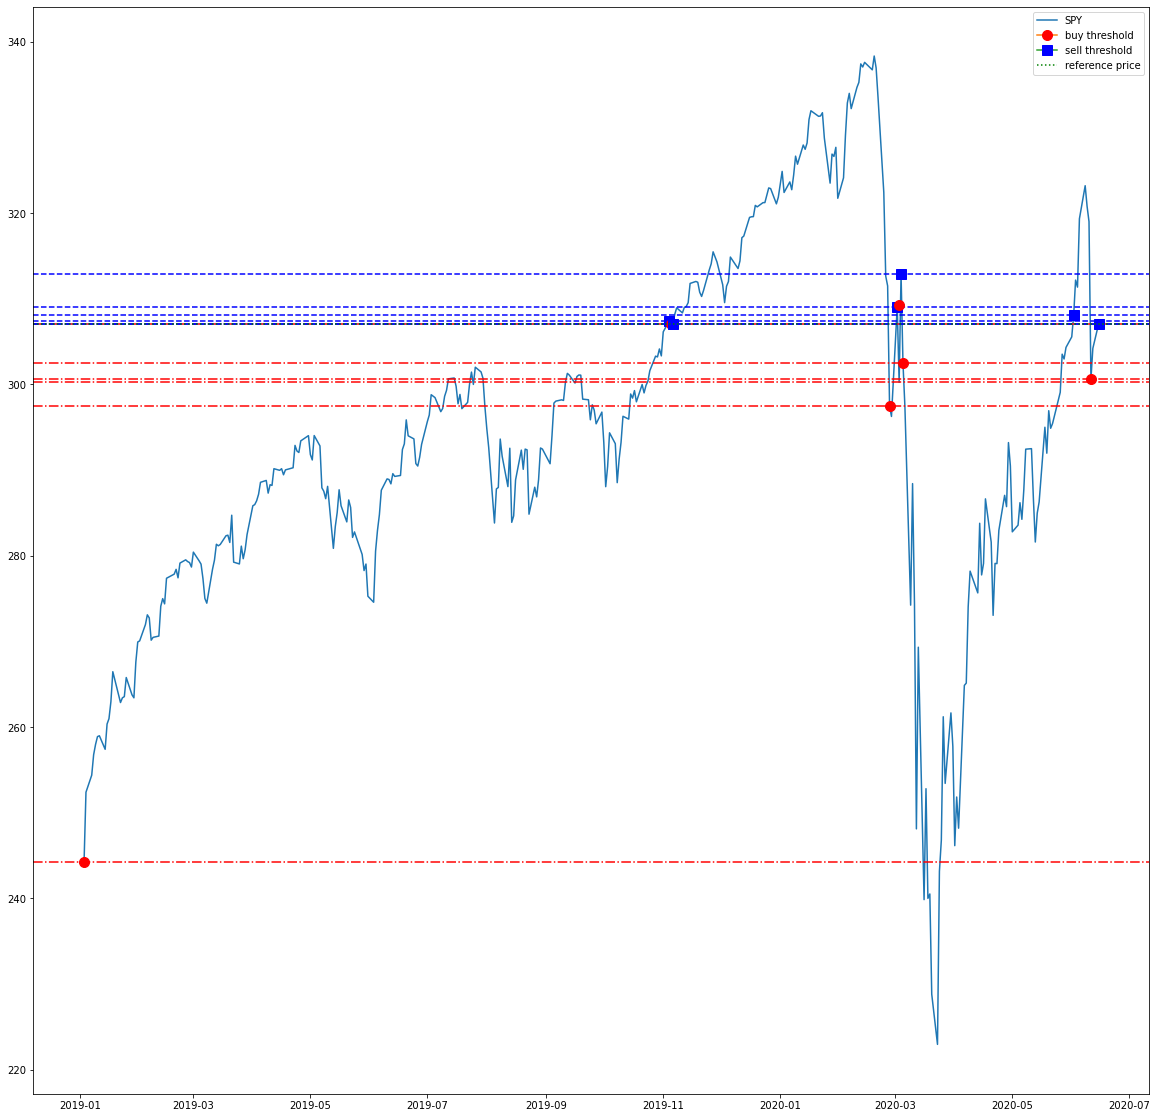

In [292]:
#Plot the graph and input the legends
plt.figure(figsize=(20,20))
plt.plot(df2['date'], df2['4. close'], label = 'SPY')
plt.axhline(y = 244.21, color = 'r', linestyle = '-.') #r is for buying, b is for selling
plt.plot(np.datetime64('2019-01-03'), 244.21, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red", label='buy threshold')
plt.axhline(y = 307.37, color = 'b', linestyle = '--')
plt.plot(np.datetime64('2019-11-04'), 307.37, marker="s", markersize=10, markeredgecolor="blue", markerfacecolor="blue", label='sell threshold')
plt.axhline(y = 307.03, color = 'r', linestyle = '-.')
plt.plot(np.datetime64('2019-11-05'), 307.03, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
plt.axhline(y = 307.1, color = 'b', linestyle = '--')
plt.plot(np.datetime64('2019-11-06'), 307.1, marker="s", markersize=10, markeredgecolor="blue", markerfacecolor="blue")
plt.axhline(y = 297.51, color = 'r', linestyle = '-.')
plt.plot(np.datetime64('2020-02-27'), 297.51, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
plt.axhline(y = 309.09, color = 'b', linestyle = '--')
plt.plot(np.datetime64('2020-03-02'), 309.09, marker="s", markersize=10, markeredgecolor="blue", markerfacecolor="blue")
plt.axhline(y = 300.24, color = 'r', linestyle = '-.')
plt.plot(np.datetime64('2020-03-03'), 309.24, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
plt.axhline(y = 312.86, color = 'b', linestyle = '--')
plt.plot(np.datetime64('2020-03-04'), 312.86, marker="s", markersize=10, markeredgecolor="blue", markerfacecolor="blue")
plt.axhline(y = 302.46, color = 'r', linestyle = '-.')
plt.plot(np.datetime64('2020-03-05'), 302.46, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
plt.axhline(y = 308.08, color = 'b', linestyle = '--')
plt.plot(np.datetime64('2020-06-02'), 308.08, marker="s", markersize=10, markeredgecolor="blue", markerfacecolor="blue")
plt.axhline(y = 300.61, color = 'r', linestyle = '-.')
plt.plot(np.datetime64('2020-06-11'), 300.61, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
plt.axhline(y = 307.05, color = 'b', linestyle = '--')
plt.plot(np.datetime64('2020-06-15'), 307.05, marker="s", markersize=10, markeredgecolor="blue", markerfacecolor="blue")

plt.axhline(y = 307.05, color = 'g', linestyle = 'dotted', label='reference price')
plt.legend()


plt.show()